**Цель работы:** исследование методов анализа ассоциативных правил.

**Постановка задачи:**
- В файле "ass_rules.pdf" находится программный код для выполнения данной работы. Провести исследование методов анализа ассоциативных правил на датасете с Kaggle:

- Загрузить датасет из репозитория (например, kaggle.com или аналогичных платформ). Данные должны представлять собой информацию о купленных вместе товарах .

- Привести описание данных из датасета: график вывода длин транзакций, список уникальных товаров и др.

- Алгоритм Apriori: выполнить анализ ассоциативных правил при помощи алгоритма Apriori с изначальными условиями в соответствии с вариантом задания. Проанализировать полученные результаты, выделив полезные и тривиальные правила, и оценив значение достоверности, лифта правил. Провести оценку влияния параметров алгоритма на получаемые правила (на количество правил и метрики).

- Алгоритм FPG: провести анализ правил, используя алгоритм FPG. В отчете привести правила, получившиеся в результате использования данного алгоритма.

- Алгоритмически определить минимальные значения поддержки для составления правил из 1, 2, и т.д. объектов в одном из алгоритмов.

- Последовательно меняя параметры (значения поддержки и достоверности) одного из алгоритмов получить наборы ассоциативных правил. Сделать выводы на основе проведенных экспериментов.

- Проанализировать получающийся в результате работы программы граф. Объяснить, какую информацию можно из него извлечь.

- Предложить и реализовать свой способ визуализации ассоциативных правил и метрик.

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx
import time

support = 0.02
threshold = 0.25

#Загрузка данных
all_data = pd.read_csv('data.csv')
print(all_data)

              shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0             NaN              NaN  NaN 

## **Анализ транзакций**

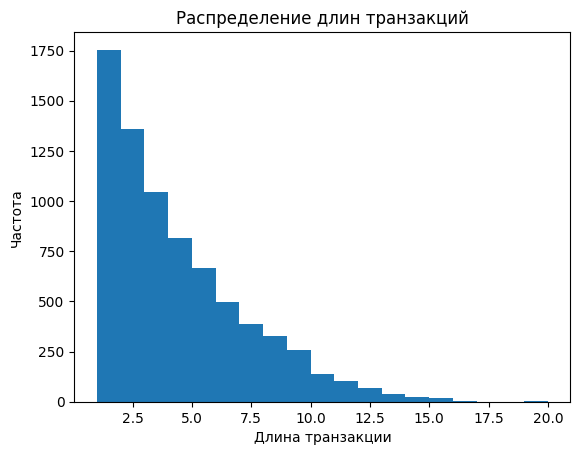

In [52]:
transaction_lengths = all_data.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()

- Максимальная длина транзакции = 20
- Около 750 транцакций с пятью товарами

## **Уникальные товары**

In [53]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

unique_items = set()

for row in np_data:
    for elem in row:
        unique_items.add(elem)
        
print(unique_items)

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

print("Кол-во уникальных: ", len(unique_items))


{'ketchup', 'carrots', 'french fries', 'clothes accessories', 'spinach', 'sparkling water', 'bug spray', 'mushroom cream sauce', 'eggplant', ' asparagus', 'honey', 'turkey', 'ham', 'water spray', 'tomato juice', 'tomato sauce', 'cream', 'butter', 'dessert wine', 'light cream', 'parmesan cheese', 'spaghetti', 'chutney', 'fresh bread', 'white wine', 'mint', 'vegetables mix', 'pickles', 'oatmeal', 'strawberries', 'gums', 'avocado', 'fromage blanc', 'sandwich', 'cottage cheese', 'corn', 'eggs', 'asparagus', 'barbecue sauce', 'pepper', 'cereals', 'soup', 'chocolate bread', 'extra dark chocolate', 'protein bar', 'babies food', 'rice', 'strong cheese', 'body spray', 'soda', 'cider', 'escalope', 'frozen vegetables', 'shallot', 'bramble', 'green tea', 'bacon', 'tomatoes', 'milk', 'burger sauce', 'cookies', 'grated cheese', 'toothpaste', 'chicken', 'muffins', 'candy bars', 'green beans', 'salad', 'brownies', 'salt', 'flax seed', 'energy bar', 'cooking oil', 'olive oil', 'gluten free bar', 'shrim

## **Алгоритм FPG**

In [54]:
start_time = time.time()
df1 = fpgrowth(data, min_support=support, use_colnames = True)
end_time = time.time()

print(f"Время выполнения: {(end_time - start_time):.4f} секунд")

print(df1)
print("Максимальная поддержка: ", max(df1['support']))

rules = association_rules(df1, metric = "confidence", min_threshold = threshold)

print("ТОП-5")
print(rules['lift'].nlargest(5))
print(rules['conviction'].nlargest(5))
rules_for_plt = rules

rules

Время выполнения: 0.3772 секунд
     support                      itemsets
0   0.142533                        (eggs)
1   0.025600                     (avocado)
2   0.119067                   (green tea)
3   0.105467                        (milk)
4   0.052267            (whole wheat rice)
..       ...                           ...
59  0.020533         (spaghetti, pancakes)
60  0.030133  (mineral water, ground beef)
61  0.029067      (spaghetti, ground beef)
62  0.020267         (mineral water, cake)
63  0.023067    (olive oil, mineral water)

[64 rows x 2 columns]
Максимальная поддержка:  0.16133333333333333
ТОП-5
8     3.309127
7     2.699088
10    2.517169
2     2.272466
3     2.259271
Name: lift, dtype: float64
8     1.505387
7     1.485556
10    1.412142
2     1.324122
4     1.319687
Name: conviction, dtype: float64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(eggs),(mineral water),0.142533,0.161333,0.040267,0.282507,1.751077,1.0,0.017271,1.168885,0.500221,0.152757,0.144484,0.266047
1,(milk),(spaghetti),0.105467,0.126933,0.029333,0.278129,2.191142,1.0,0.015946,1.209450,0.607710,0.144452,0.173178,0.254611
2,(milk),(mineral water),0.105467,0.161333,0.038667,0.366625,2.272466,1.0,0.021651,1.324122,0.625968,0.169492,0.244783,0.303147
3,(mineral water),(spaghetti),0.161333,0.126933,0.046267,0.286777,2.259271,1.0,0.025788,1.224114,0.664602,0.191185,0.183083,0.325636
4,(spaghetti),(mineral water),0.126933,0.161333,0.046267,0.364496,2.259271,1.0,0.025788,1.319687,0.638416,0.191185,0.242245,0.325636
5,(chocolate),(mineral water),0.111733,0.161333,0.032000,0.286396,1.775183,1.0,0.013974,1.175255,0.491607,0.132743,0.149121,0.242372
6,(pancakes),(mineral water),0.084400,0.161333,0.028000,0.331754,2.056324,1.0,0.014383,1.255026,0.561048,0.128598,0.203204,0.252654
7,(ground beef),(mineral water),0.069200,0.161333,0.030133,0.435453,2.699088,1.0,0.018969,1.485556,0.676305,0.150366,0.326852,0.311115
8,(ground beef),(spaghetti),0.069200,0.126933,0.029067,0.420039,3.309127,1.0,0.020283,1.505387,0.749684,0.173982,0.335719,0.324515
9,(cake),(mineral water),0.068000,0.161333,0.020267,0.298039,1.847351,1.0,0.009296,1.194749,0.492150,0.096939,0.163004,0.211830


#### Результаты FPG:

Судить по будем по lift, так как он показывает насколько часто наше правило лучше работает, чем просто покупка antecedent'a. Также будем сравнивать это значение с conviction, так как оно показывает, что наше правило не случайно.

**Топ 5:**
- Фарш со спагетти (lift = 331% | conv = 151%)
- Фарш с водичкой (lift = 270% | conv = 149%)
- Оливковое масло с водичкой (lift = 252% | conv = 141%)
- Молоко со спагетти (lift = 227% | conv = 132%)
- Спагетти с водичкой (lift = 226% | conv = 132%)

## **Apriori**

In [55]:
start_time = time.time()
df1 = apriori(data, min_support=support, use_colnames = True)
end_time = time.time()

print(f"Время выполнения: {(end_time - start_time):.4f} секунд")


print(df1)

rules = association_rules(df1, metric = "confidence", min_threshold =threshold)
print(rules)

print("ТОП-5")
print(rules['lift'].nlargest(5))
print(rules['conviction'].nlargest(5))


Время выполнения: 0.0202 секунд
     support                    itemsets
0   0.025600                   (avocado)
1   0.030667                  (brownies)
2   0.023200                    (butter)
3   0.068000                      (cake)
4   0.022400                   (cereals)
..       ...                         ...
59  0.029333           (milk, spaghetti)
60  0.023067  (olive oil, mineral water)
61  0.028000   (mineral water, pancakes)
62  0.046267  (mineral water, spaghetti)
63  0.020533       (spaghetti, pancakes)

[64 rows x 2 columns]
        antecedents      consequents  antecedent support  consequent support  \
0            (cake)  (mineral water)            0.068000            0.161333   
1       (chocolate)  (mineral water)            0.111733            0.161333   
2            (eggs)  (mineral water)            0.142533            0.161333   
3     (ground beef)  (mineral water)            0.069200            0.161333   
4     (ground beef)      (spaghetti)            0.069

#### Результаты Apriori:

Судить по будем по lift, так как он показывает насколько часто наше правило лучше работает, чем просто покупка antecedent'a. Также будем сравнивать это значение с conviction, так как оно показывает, что наше правило не случайно.

**Топ 5:**
- Фарш со спагетти (lift = 331% | conv = 151%)
- Фарш с водичкой (lift = 270% | conv = 149%)
- Оливковое масло с водичкой (lift = 252% | conv = 141%)
- Молоко со спагетти (lift = 227% | conv = 132%)
- Спагетти с водичкой (lift = 226% | conv = 132%)

## **Сравнение FPG и Apriori**
- **Время:** Apriori отработал быстрее FPG, но FPG должен быть быстрее, так как Apriori вынужден идти по всем данным. Так могло случиться из-за min_support или маленького объема данных.
- **Результаты:** Идентичны 

## **Товары:**

     support        itemsets
26  0.161333   mineral water
11  0.142533            eggs
14  0.138400    french fries
32  0.126933       spaghetti
19  0.119067       green tea
7   0.111733       chocolate
25  0.105467            milk
28  0.084400        pancakes
24  0.070267  low fat yogurt
20  0.069200     ground beef


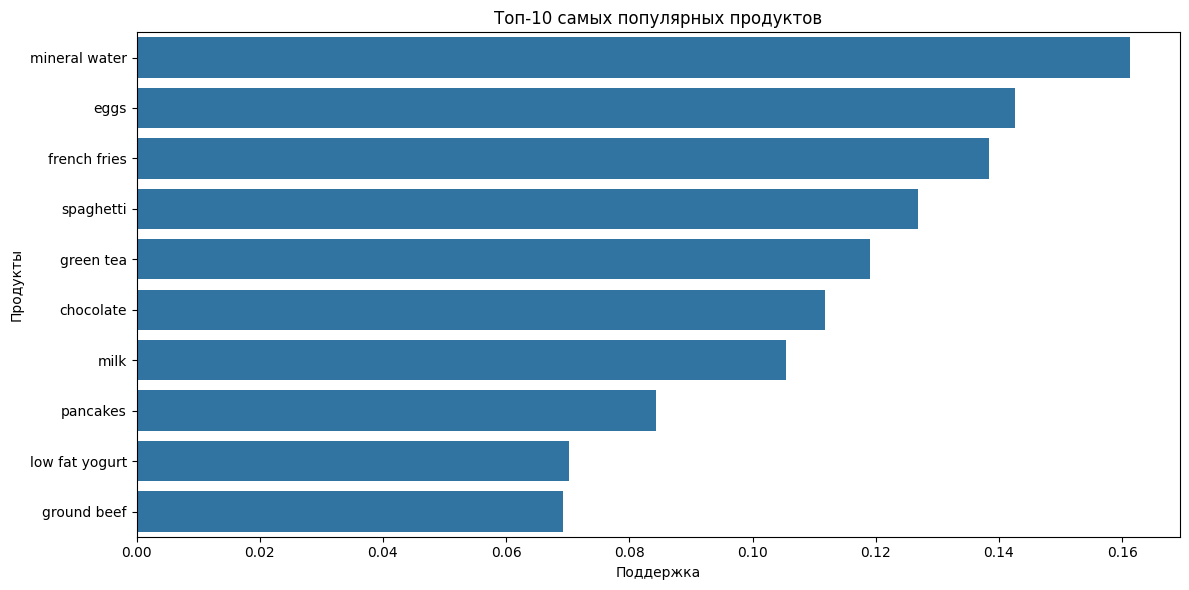

In [56]:
df1['itemsets'] = df1['itemsets'].apply(lambda x: ', '.join(list(x)))
top_products = df1.sort_values(by='support', ascending=False).head(10)
print(top_products)

plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_products)
plt.title('Топ-10 самых популярных продуктов')
plt.xlabel('Поддержка')
plt.ylabel('Продукты')
plt.tight_layout()
plt.show()

Водичка, яйца, французкие фраи, спагетти, зеленый чай, шоколад, молоко, панкейки, нежирный йогурт, фарш.


## **График достоверности**

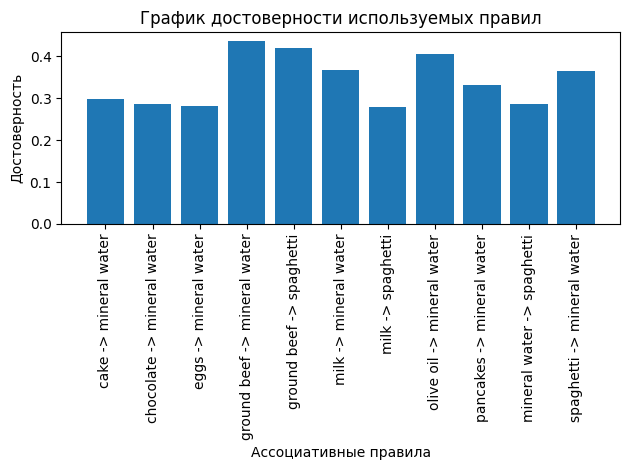

In [57]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))


products_1 = rules["antecedents"].tolist()
products_2 = rules["consequents"].tolist()
confidence = rules["confidence"].tolist()
rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]

plt.bar(rules_labels, confidence)
plt.xlabel("Ассоциативные правила")
plt.ylabel("Достоверность")
plt.title("График достоверности используемых правил")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Самое достоверное правило:** фарш с водичкой

## **Визуализация ассоциативных правил в виде графа**

C:\Users\maksg\AppData\Local\Temp\ipykernel_27580\4116020010.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


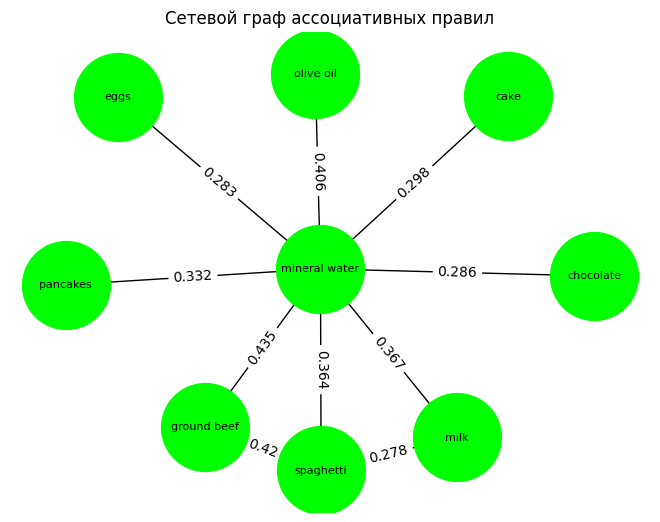

In [ ]:
G = nx.Graph()
for product in rules["antecedents"]:
    G.add_node(product)
for product in rules["consequents"]:
    G.add_node(product)
for index, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])
     
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='lime', font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
rounded_edge_labels = {key: round(value, 3) for key, value in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=rounded_edge_labels)
plt.title('Сетевой граф ассоциативных правил')
plt.tight_layout()
plt.show()

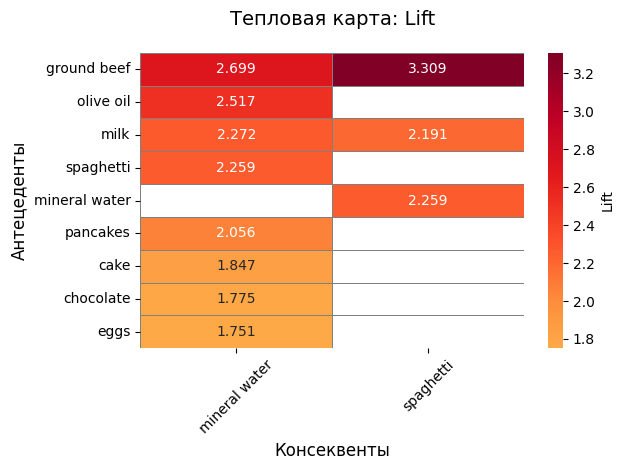

In [59]:
data = rules[['antecedents','consequents' , 'lift']]

pivot_table = data.pivot(index='antecedents', columns='consequents', values='lift')
sorted_antecedents = data.groupby('antecedents')['lift'].max().sort_values(ascending=False).index
pivot_table_sorted = pivot_table.reindex(sorted_antecedents)
 
heatmap_sorted = sns.heatmap(
    pivot_table_sorted, 
    annot=True, 
    fmt='.3f', 
    cmap='YlOrRd', 
    cbar_kws={'label': 'Lift'},
    linewidths=0.5,
    linecolor='gray',
    center=2.0
)

plt.title('Тепловая карта: Lift', fontsize=14, pad=20)
plt.xlabel('Консеквенты', fontsize=12)
plt.ylabel('Антецеденты', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\maksg\AppData\Local\Temp\ipykernel_27580\3174467727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lift_percentage'] = (data['lift'] / total_lift) * 100
C:\Users\maksg\AppData\Local\Temp\ipykernel_27580\3174467727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['antecedents'] + ' → ' + data['consequents']


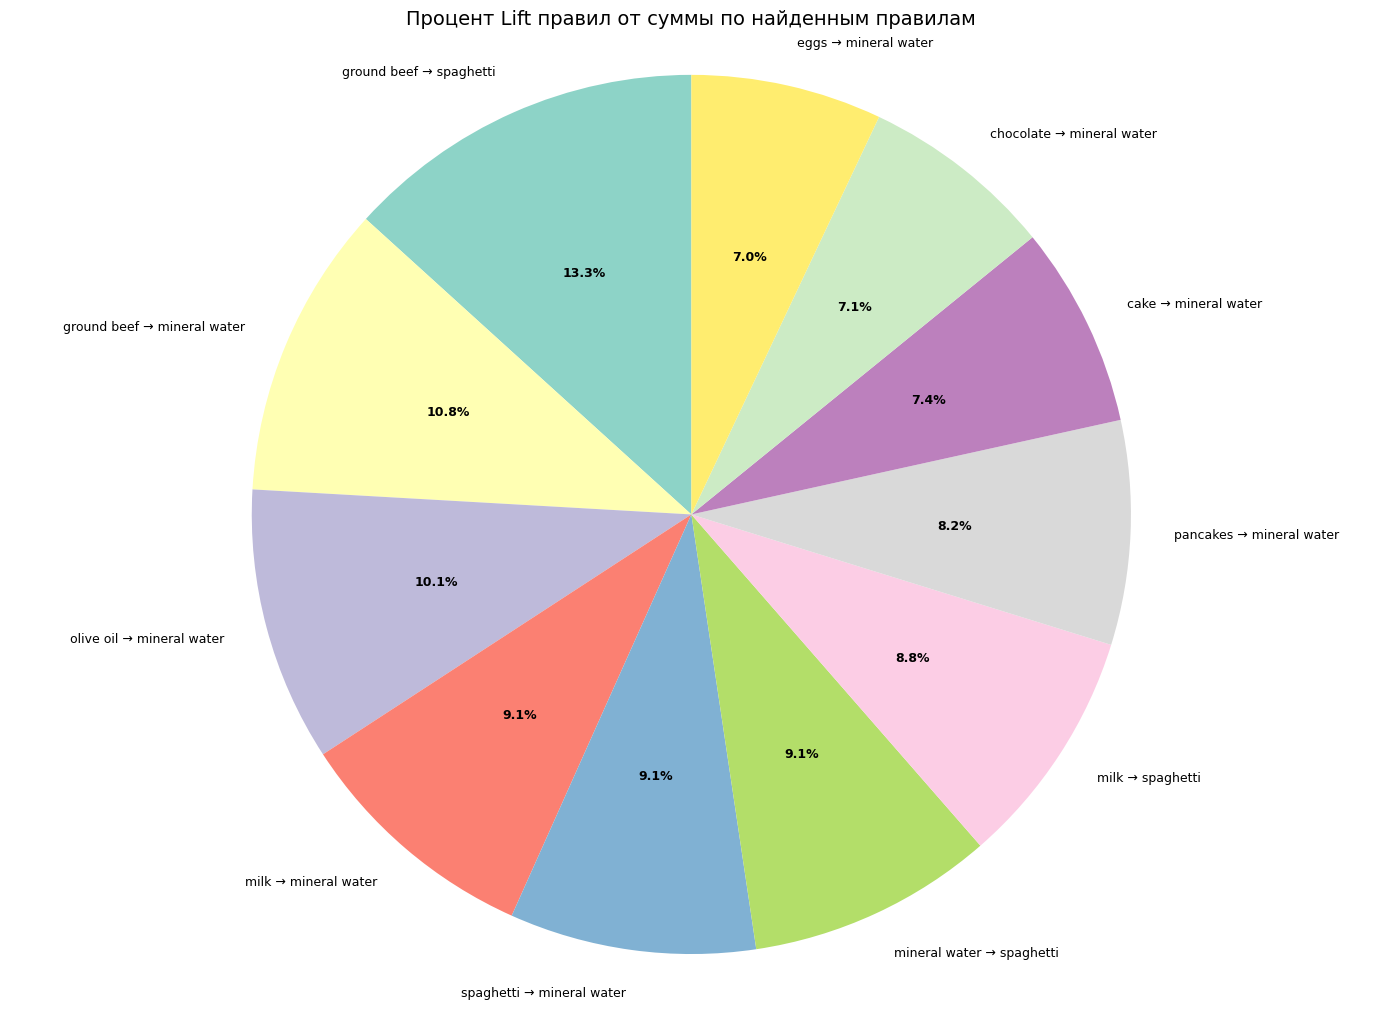

In [60]:
import numpy as np

total_lift = data['lift'].sum()
data['lift_percentage'] = (data['lift'] / total_lift) * 100

data['label'] = data['antecedents'] + ' → ' + data['consequents']

data_sorted = data.sort_values('lift_percentage', ascending=False)

plt.figure(figsize=(14, 10))

colors = plt.cm.Set3(np.linspace(0, 1, len(data_sorted)))
wedges, texts, autotexts = plt.pie(data_sorted['lift_percentage'], 
                                  labels=data_sorted['label'],
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors,
                                  textprops={'fontsize': 9})

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.title('Процент Lift правил от суммы по найденным правилам', 
          fontsize=14, pad=20)
plt.axis('equal')

legend_labels = [f"{row['label']}\nLift: {row['lift']:.3f} ({row['lift_percentage']:.1f}%)" 
                for _, row in data_sorted.iterrows()]

plt.tight_layout()
plt.show()

## **Заключение**

В ходе выполнения работы был проведён комплексный анализ ассоциативных правил на основе реального датасета покупок с использованием алгоритмов Apriori и FPG. С заданными доверенностью и поддержкой было выявлено 10 правил по два предмета. Результаты по двум алгоритмам сошлись, хоть и время работы алгоритмов должно было получиться другое. Алгоритм Apriori отработал быстрее алгоритма FPG, вероятно из-за объема выборки и того, что FPG стоит деревья по другому и сложнее. Визуализация результатов выполнена с помощью графа, тепловой карты по lift, круговой гистограммы по lift.